In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt, dates, colors, patches
from datetime import datetime, timedelta
from tqdm import tqdm

%matplotlib inline

In [2]:
plt.rcParams['font.size'] = 14

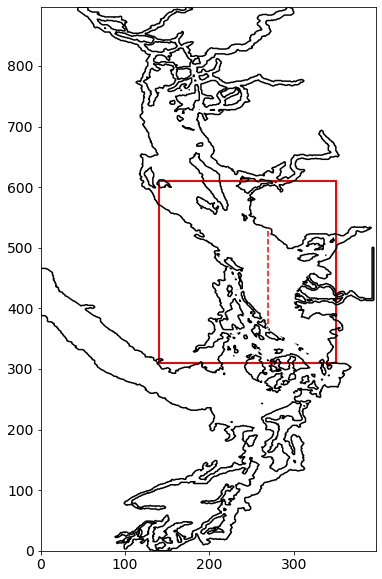

In [3]:
mask = xr.open_dataset('/home/bmoorema/MEOPAR/grid/mesh_mask202108.nc')
tmask = mask.tmask.values[0, 0, ...]

fig, ax = plt.subplots(figsize=(6, 10))
ax.contour(tmask, levels=[-0.01, 0.01], colors='k')
ax.add_patch(patches.Rectangle((140, 310), 210, 300, fill=False, lw=2, ec='r'))
ax.plot([270, 270], [375, 535], 'r--')

In [4]:
datestr = '20160401_20160930'
path = '/project/def-allen/bmoorema/results/Currents/'
fn = f'SalishSea_1h_{datestr}_grid_T.nc'
salinity = {}

slc = {'deptht': slice(0, 20), 'y': slice(375, 535), 'x': 270}

for runID in ['nowaves', 'base', 'charnock']:
    
    salinity[runID] = {}
    folder = f'SalishSeaCast_currenttuning_{runID}_{datestr}/'
    ds = xr.open_dataset(path + folder + fn).vosaline.isel(**slc)
    
    for month in tqdm(range(4, 10), desc=f'Loading {runID}'):
        start = datetime(2016, month, 1)
        salinity[runID][start.strftime('%b')] = ds.sel(time_counter=slice(start, start+timedelta(days=30))).values.mean(axis=0)

Loading charnock: 100%|██████████████████████████████████████████████| 6/6 [23:40<00:00, 236.79s/it]


In [5]:
for runID in ['nowaves', 'base', 'charnock']:
    salinity[runID]['all'] = np.mean(list(salinity[runID].values()), axis=0)

In [12]:
def plot_salinity(month):
    """Plot surface salinity and anomalies between wave cases
    """
    
    fig, axs = plt.subplots(2, 3, figsize=(15, 8), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})
    for col, runID in zip(axs.T, ['nowaves', 'base', 'charnock']):
        c1 = col[0].contourf(salinity[runID][month], levels=range(5, 31), cmap='viridis', extend='both')
        c2 = col[1].contourf(salinity[runID][month] - salinity['nowaves'][month], levels=np.arange(-2, 2.1, 0.1), cmap='RdBu_r', extend='both')
        col[0].set_title(runID, fontsize=14)
        for ax in col:
            ax.set_ylim([20, 0])

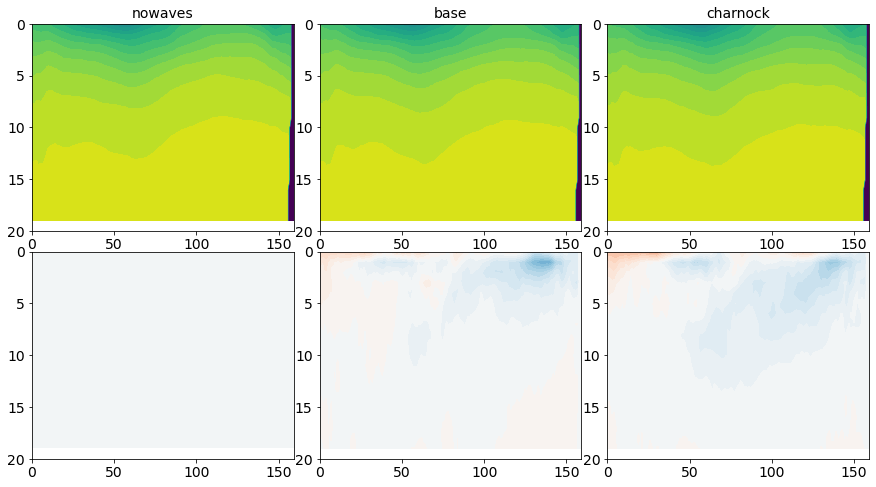

In [15]:
# 2016 Jun 1
plot_salinity('Apr')

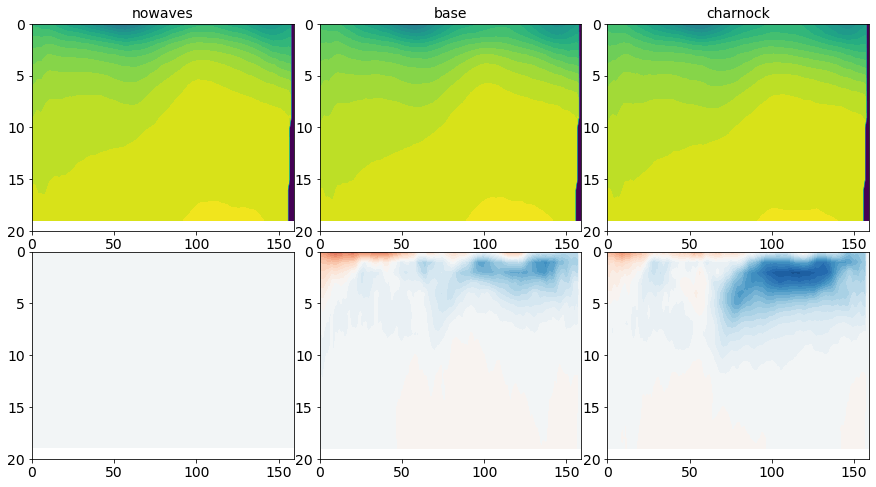

In [13]:
# 2016 Jun 1
plot_salinity('May')

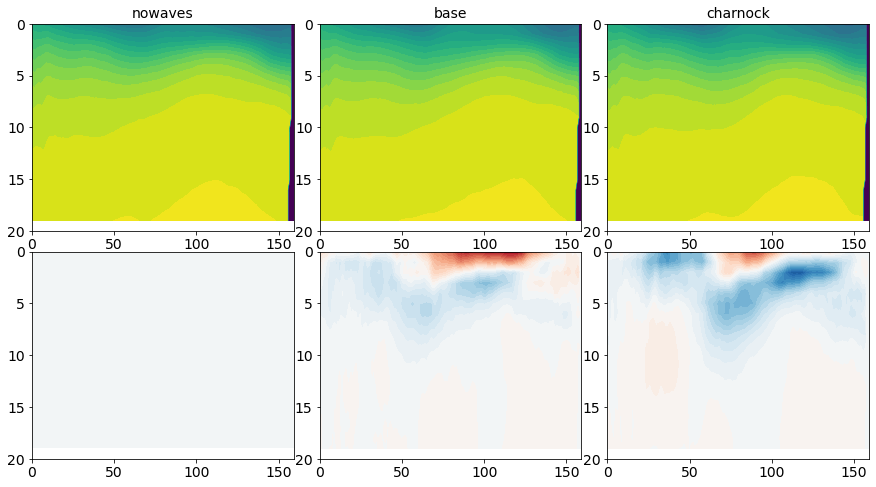

In [16]:
# 2016 Jun 1
plot_salinity('Jun')

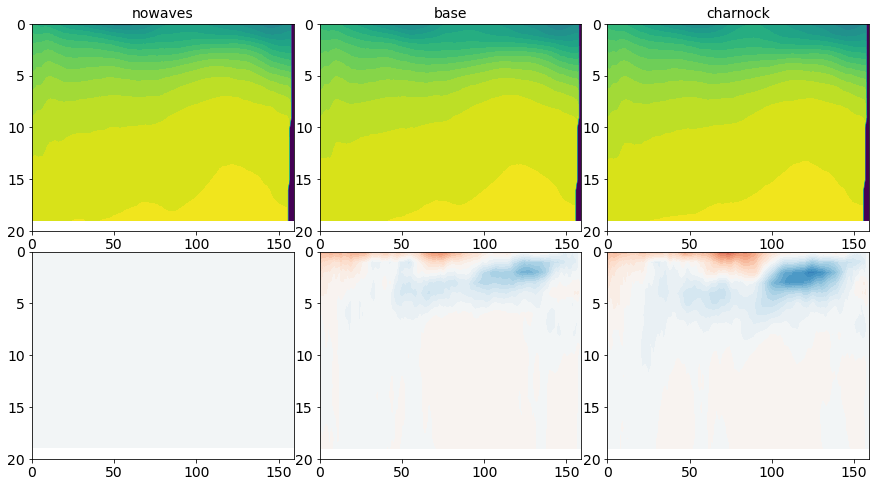

In [17]:
# 2016 Jun 1
plot_salinity('Jul')

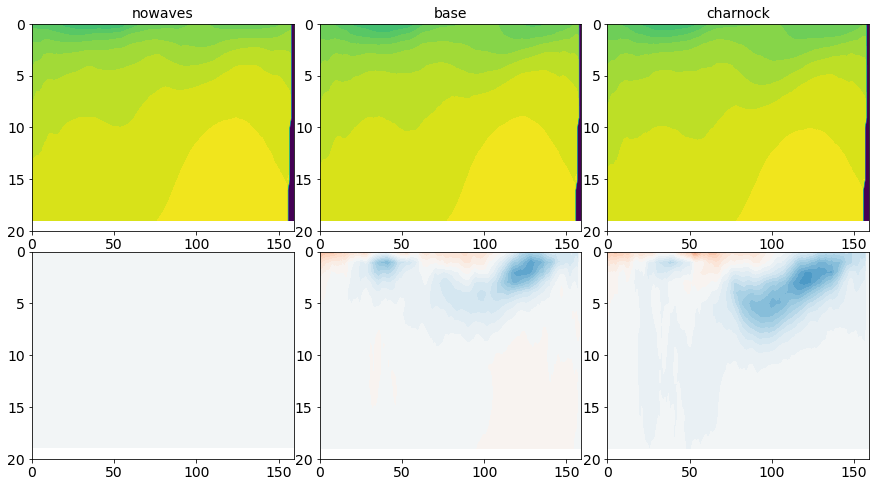

In [18]:
# 2016 Jun 1
plot_salinity('Aug')

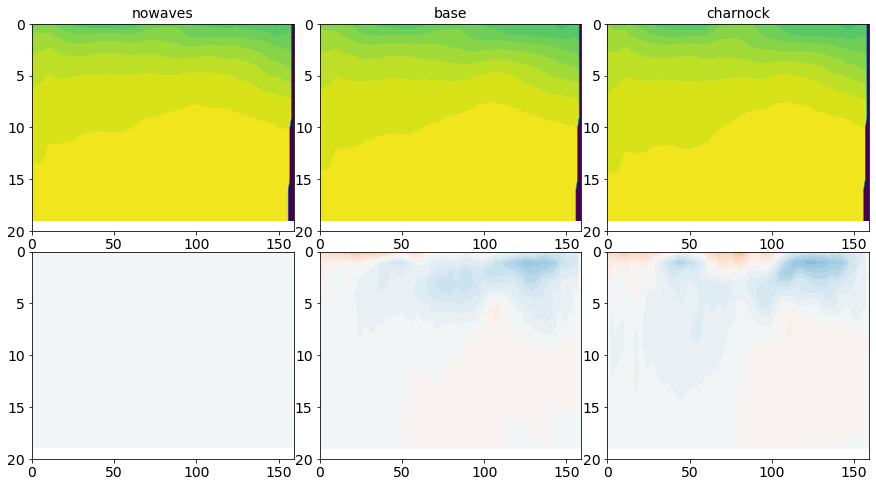

In [19]:
# 2016 Jun 1
plot_salinity('Sep')

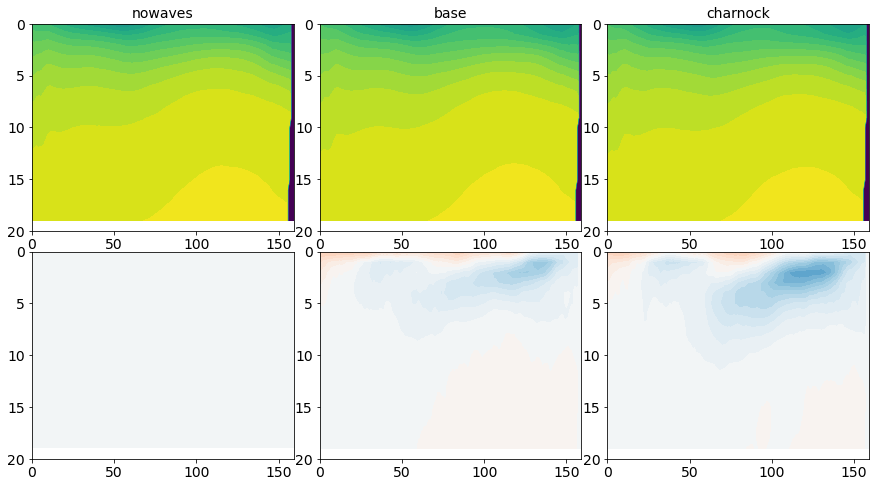

In [14]:
# 2016 Apr-Sep
plot_salinity('all')